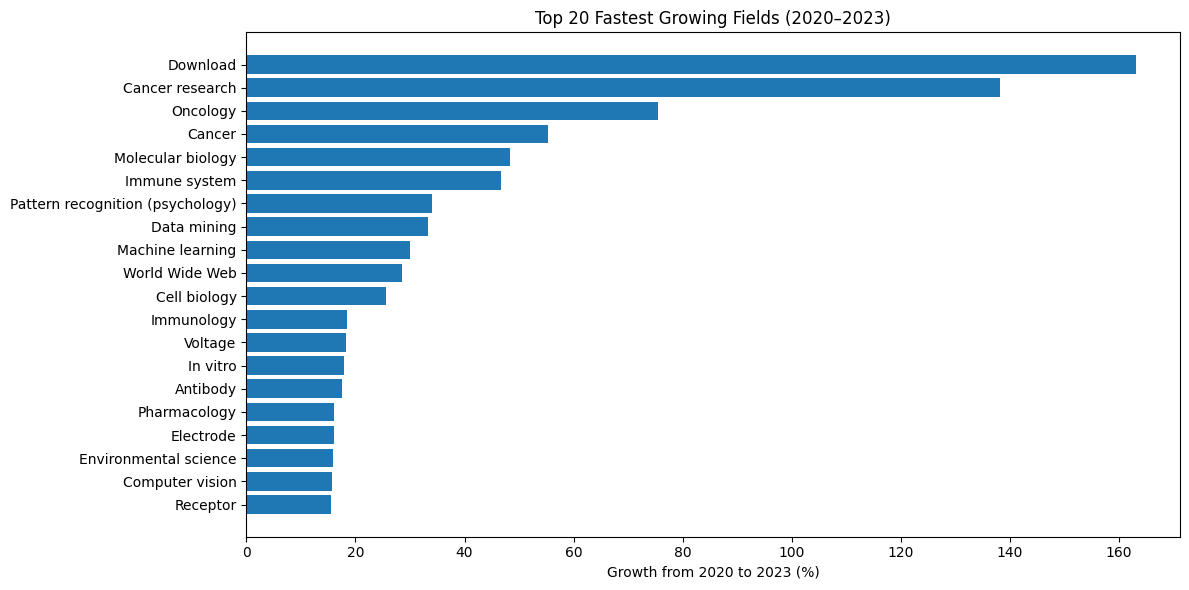

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Query OpenAlex API
url = "https://api.openalex.org/concepts?per-page=200&sort=works_count:desc"
response = requests.get(url)
data = response.json()

# Step 2: Validate API response
if 'results' not in data:
    raise ValueError("API response does not contain 'results' field.")

concepts = data['results']

# Step 3: Calculate growth from 2020 to 2023
records = []
for concept in concepts:
    name = concept['display_name']
    years = concept.get('counts_by_year', [])
    year_dict = {y['year']: y['works_count'] for y in years}

    if 2020 in year_dict and 2023 in year_dict and year_dict[2020] > 0:
        growth = (year_dict[2023] - year_dict[2020]) / year_dict[2020] * 100
        records.append({
            "Field": name,
            "Papers 2020": year_dict[2020],
            "Papers 2023": year_dict[2023],
            "Growth % (2020→2023)": round(growth, 2)
        })

# Step 4: Create DataFrame and select Top 20
df = pd.DataFrame(records)
df_top = df.sort_values(by="Growth % (2020→2023)", ascending=False).head(20)

# Step 5: Visualize
plt.figure(figsize=(12, 6))
plt.barh(df_top["Field"], df_top["Growth % (2020→2023)"])
plt.xlabel("Growth from 2020 to 2023 (%)")
plt.title("Top 20 Fastest Growing Fields (2020–2023)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
